In [1]:
import pandas as pd
import numpy as np

% matplotlib inline
import matplotlib.pyplot as plt

In [2]:
filenames = [ 'raw-data/covis-nas1.txt', \
        'raw-data/covis-nas3.txt', \
        'raw-data/covis-nas6.txt' ]

fsz = [pd.read_csv(f, delim_whitespace=True, header=0, names=['nas','bytes','filename']) for f in filenames]

files = pd.concat(fsz)

print(files)

       nas       bytes                                           filename
0        1     3224599  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T125...
1        1     3231845  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T185...
2        1  1587003908  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T153...
3        1  1581885971  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T121...
4        1   160634205  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T180...
5        1  1614996135  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T211...
6        1  1609607342  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T183...
7        1     3140924  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T010...
8        1  1637845830  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T063...
9        1   163650038  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T210...
10       1     3199800  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T215...
11       1   159311472  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T060...
12       1   158660859  ./2011/10/01/A

In [3]:
ts = pd.DataFrame()
ts['str'] = files['filename'].str.extract('([\.\/a-zA-Z0-9]*)_([0-9T]*)', expand=True)[1]
files['datetime'] = pd.to_datetime(ts['str'], format='%Y%m%dT%H%M%S')

## Extract type
files['datatype'] = files['filename'].str.extract('([\.\/\w]*)-([A-Z]*)', expand=True)[1]

##files = files.set_index('datetime')



Type = IMAGING
Mean = 473802101.049324 bytes, stddev = 107757663.117764 bytes
     = 451.852895 MiB, 102.765716 MiB


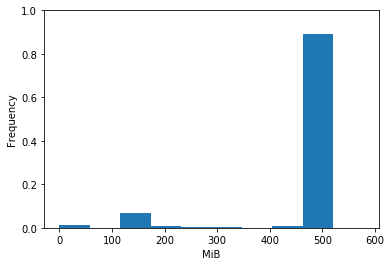

Type = DOPPLER
Mean = 339754543.041780 bytes, stddev = 989384364.729457 bytes
     = 324.015182 MiB, 943.550458 MiB


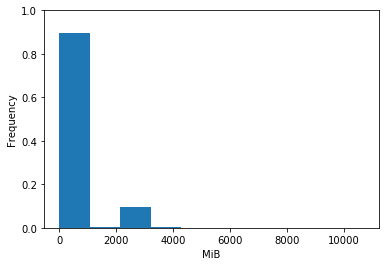

Type = DIFFUSE
Mean = 2492727.970118 bytes, stddev = 369276.391196 bytes
     = 2.377251 MiB, 0.352169 MiB


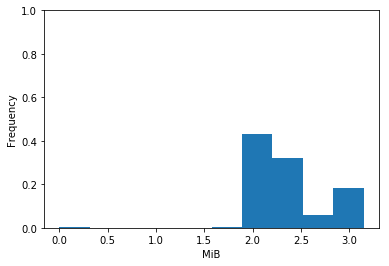

In [4]:
datatypes = ['IMAGING', 'DOPPLER', 'DIFFUSE']
files['mib'] = files['bytes'] / 2**20

for dt in datatypes:
    print("Type = %s" % dt)
        
    relevant = files[ files['datatype'] == dt ]
        
    mean_size = relevant['bytes'].mean()
    std_size = relevant['bytes'].std()
    print("Mean = %f bytes, stddev = %f bytes" % (mean_size, std_size) )
    print("     = %f MiB, %f MiB" % (relevant['mib'].mean(), relevant['mib'].std()))

    plt.figure()
    weights = np.ones_like(relevant['mib'])/float(len(relevant['mib']))
    plt.hist( relevant['mib'],normed=False, weights=weights)
    plt.ylim(0.0,1.0)
    plt.ylabel('Frequency')
    plt.xlabel('MiB')
    plt.show()

In [16]:
dedup = files.drop_duplicates(subset=['datetime'])
dedup['count'] = 1
print(dedup)
dedup['date'] = dedup['datetime'].dt.date
byday = dedup.groupby(['datatype','date']).sum()

       nas       bytes                                           filename  \
0        1     3224599  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T125...   
1        1     3231845  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T185...   
2        1  1587003908  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T153...   
3        1  1581885971  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T121...   
4        1   160634205  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T180...   
5        1  1614996135  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T211...   
6        1  1609607342  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T183...   
7        1     3140924  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T010...   
8        1  1637845830  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T063...   
9        1   163650038  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T210...   
10       1     3199800  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T215...   
11       1   159311472  ./2011/10/01/APLUWCOVISMBSONAR001_20111001T060...   

/Users/aaron/workspace/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/aaron/workspace/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
print(byday)

                     nas       bytes          mib  count
datatype date                                           
DIFFUSE  2011-09-28    8    24991772    23.834011      8
         2011-09-29    8    25668923    24.479793      8
         2011-09-30    8    25079022    23.917219      8
         2011-10-01    8    25434240    24.255981      8
         2011-10-02    8    25539869    24.356717      8
         2011-10-03    8    25536850    24.353838      8
         2011-10-04    8    25397544    24.220985      8
         2011-10-05    8    25491402    24.310495      8
         2011-10-06    8    25481766    24.301306      8
         2011-10-07    8    25571698    24.387072      8
         2011-10-08    8    25658564    24.469913      8
         2011-10-09    8    25694496    24.504181      8
         2011-10-10    8    25615475    24.428821      8
         2011-10-11    8    25733741    24.541608      8
         2011-10-12    8    25744417    24.551789      8
         2011-10-13    8    257

             IMAGING    DOPPLER   DIFFUSE
date                                     
2011-09-30  0.010561   0.070398  0.000069
2011-10-31  0.120225   0.768929  0.000774
2011-11-30  0.178327   1.056118  0.001138
2011-12-31  0.292018   1.356432  0.001842
2012-01-31  0.379511   1.943072  0.002506
2012-02-29  0.463367   2.534071  0.003119
2012-03-31  0.577621   3.257354  0.003831
2012-04-30  0.689070   3.966427  0.004523
2012-05-31  0.785191   4.579546  0.005115
2012-06-30  0.895353   5.272196  0.005787
2012-07-31  1.008746   5.997451  0.006488
2012-08-31  1.122880   6.726412  0.007185
2012-09-30  1.233546   7.430919  0.007849
2012-10-31  1.340194   8.112320  0.008494
2012-11-30  1.433339   8.707637  0.009045
2012-12-31  1.546847   9.433834  0.009717
2013-01-31  1.660149  10.062742  0.010385
2013-02-28  1.762192  10.713577  0.010989
2013-03-31  1.876034  11.441975  0.011657
2013-04-30  1.985357  12.147903  0.012299
2013-05-31  2.092225  12.890502  0.012929
2013-06-30  2.185172  13.469625  0

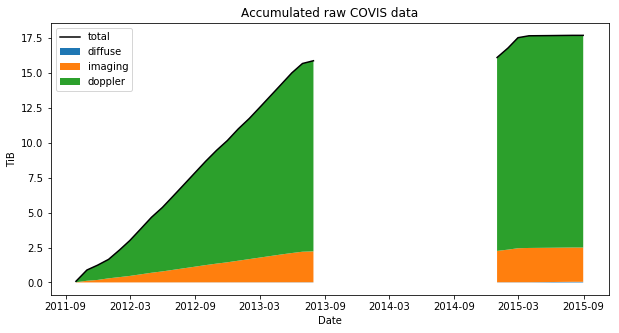

In [110]:
cumulative = pd.DataFrame(index=pd.to_datetime(byday.index.get_level_values(1)) )


for dt in datatypes:  
    relevant = byday.loc[dt]  
    cumulative[dt] = relevant['mib'].cumsum()/2**20

#     mean_size = relevant['bytes'].mean()
#     std_size = relevant['bytes'].std()
#     print("Mean = %f bytes, stddev = %f bytes" % (mean_size, std_size) )
#     print("     = %f MiB, %f MiB" % (relevant['mib'].mean(), relevant['mib'].std()))

#     plt.figure()
#     weights = np.ones_like(relevant['mib'])/float(len(relevant['mib']))
#     plt.hist( relevant['mib'],normed=False, weights=weights)
#     plt.ylim(0.0,1.0)
#     plt.ylabel('Frequency')
#     plt.xlabel('MiB')
#     plt.show()


bymonth = cumulative.groupby(pd.Grouper(level='date', freq='M')).max()
# bymonth.dropna(how='all', inplace=True)

subset =~bymonth.isnull().all(axis=1)
bymonth[subset] = bymonth[subset].fillna(method='ffill')

bymonth['total'] = bymonth.sum(1)

plt.figure()
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))
ax.fill_between(bymonth.index, 0, bymonth['DIFFUSE'], label='diffuse')
ax.fill_between(bymonth.index, bymonth['DIFFUSE'], bymonth['IMAGING']+bymonth['DIFFUSE'],  label='imaging')
ax.fill_between(bymonth.index, bymonth['IMAGING']+bymonth['DIFFUSE'], bymonth['DOPPLER']+bymonth['IMAGING']+bymonth['DIFFUSE'], label='doppler')
ax.plot(bymonth.index, bymonth['total'],color='k')
ax.set_xlabel('Date')
ax.set_ylabel('TiB')
ax.set_title('Accumulated raw COVIS data')
ax.legend()
plt.show()

In [143]:
from datetime import datetime

## Pull out subset for linear regression
subset = bymonth[ datetime(2012,1,1):datetime(2013,6,1) ].copy()
subset['dt'] = (subset.index - subset.index[0]).days

lm = np.polyfit( subset.dt, subset.total, 1 )
print(lm)
slope = np.asscalar(lm[0])

print("Growth rate %f GiB / day" % (slope * np.float64(2^10)))


[ 0.02603229  2.27883494]
Growth rate 0.208258 GiB / day
